In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import os
import glob

In [ ]:
FILE_PATH = "./Axial/"
folders = glob.glob(FILE_PATH + "*/")
images = []
labels = []
for folder in folders:
  label = folder.split('/')[-2]
  dataset = glob.glob(folder + "*.png")
  for image in dataset:
    img = cv2.imread(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    images.append(np.array(img))
    labels.append(label)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

----------------
----------------
----------------


In [ ]:
Label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label mapping:", Label_mapping)

Label mapping: {'AD': 0, 'CI': 1, 'CN': 2}


<ipython-input-62-c8248e384fb1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=labels,palette='Set1')


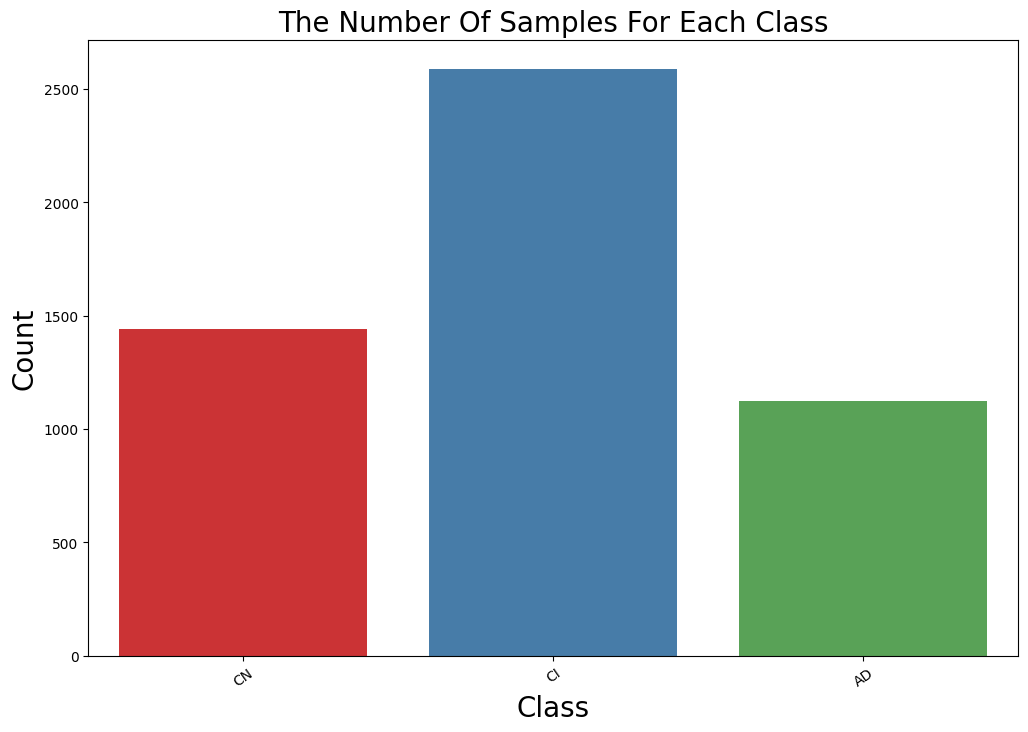

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=labels,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

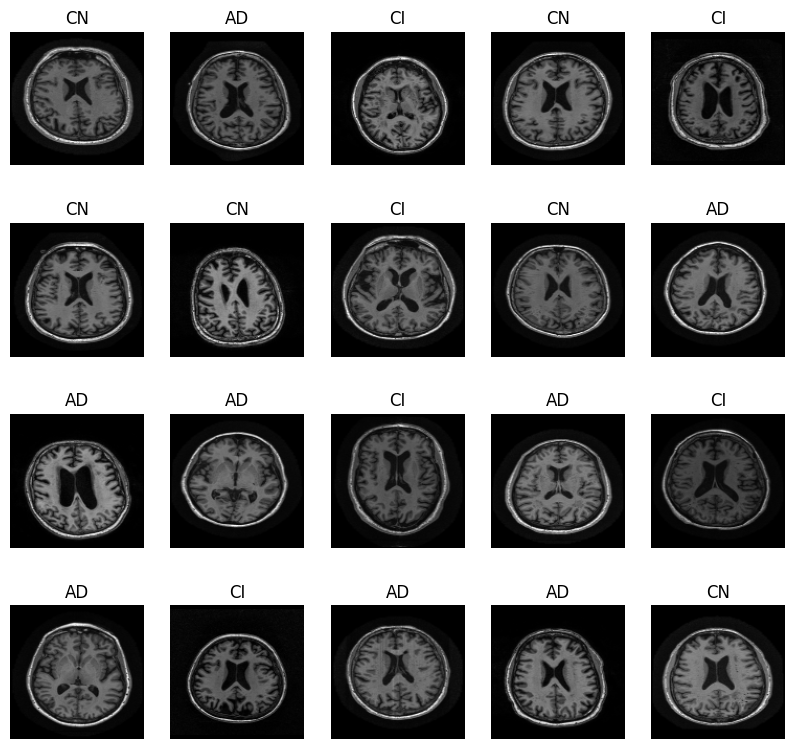

In [ ]:
plt.figure(figsize=(10,12))
for n,i in enumerate(np.random.randint(0,len(labels),20)):
    plt.subplot(5,5,n+1)
    plt.imshow(images[i], cmap="gray")
    plt.axis('off')
    plt.title(labels[i],fontsize=12)

In [ ]:
X=np.array(images)
y=np.array(labels_encoded)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, shuffle = True)

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=2,activation='relu', padding='Same', input_shape = (128,128,1)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,activation='relu', padding='Same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,765,700 (56.33 MB)

 Trainable params: 14,765,700 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=20,
    verbose=0,
    restore_best_weights=True,
)

In [ ]:
µhistory= model.fit(X_train,y_train,
                   validation_split=0.2,
                   epochs=30,
                   callbacks=[early_stopping])

Epoch 1/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.4358 - loss: 169.2678 - val_accuracy: 0.6109 - val_loss: 1.1661
Epoch 2/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7343 - loss: 0.6720 - val_accuracy: 0.7527 - val_loss: 0.8880
Epoch 3/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8137 - loss: 0.4690 - val_accuracy: 0.8509 - val_loss: 0.5168
Epoch 4/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8867 - loss: 0.2895 - val_accuracy: 0.9176 - val_loss: 0.3500
Epoch 5/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9430 - loss: 0.1665 - val_accuracy: 0.9406 - val_loss: 0.2491
Epoch 6/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9661 - loss: 0.1037 - val_accuracy: 0.9600 - val_loss: 0.1513
Epoch 7/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9654 - loss: 0.0929 - val_accuracy: 0.9794 - val_loss: 0.1094
Epoch 8/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9757 - loss: 0.0752 - val_a

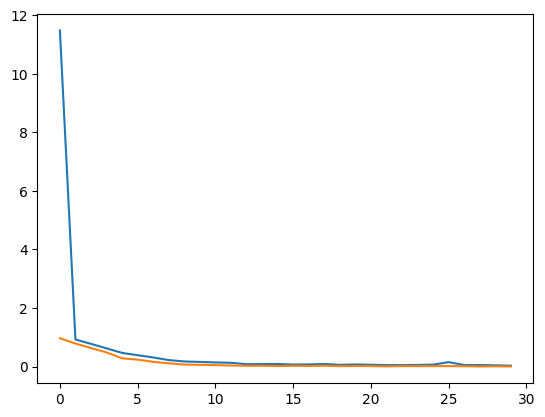

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.show()

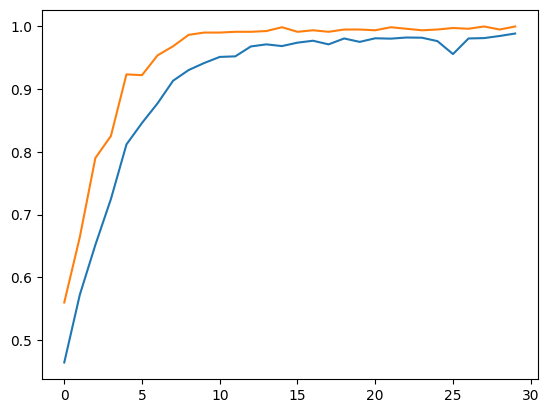

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.show()

In [ ]:
test_scores = model.evaluate(X_test,y_test)
test_scores

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9976 - loss: 0.0077


[0.005171605385839939, 0.9990300536155701]